In [6]:
#!pip install dataframe-image

In [16]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
from sklearn.dummy import DummyClassifier
pd.options.mode.chained_assignment = None  # default='warn'
plt.style.use('fivethirtyeight')

# EDA & Data Cleaning

In [222]:
df = pd.read_csv('sephora_review_data.csv')

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [223]:
df.shape

(184638, 13)

In [224]:
df.sample(3)

,item_id,product,brand,total_reviews,user_name,review_title,review_text,review_rating,helpful_votes,not_helpful_votes,verified_purchase,sephora_employee,incentivized
120122,2131472,Matcha Collagen,Vital Proteins,30,BrinaInBrooklyn,"Sweet, faint taste of matcha",I received a sample of this matcha collagen as...,1.0,2.0,2.0,0,0,1
21459,2500858,So Poreless Deep Exfoliating Blackhead Scrub,TULA Skincare,31,SayBeeheart,NaN,This product is great to use! I have been lovi...,4.0,0.0,0.0,0,0,0
107316,2318798,WASO: Giga-Hydrating Rich Cream,Shiseido,186,ivyfelicia,I Am Loving It!,Amazing! The hydration in this cream is just w...,5.0,0.0,0.0,0,0,1


In [225]:
df.columns

Index(['item_id', 'product', 'brand', 'total_reviews', 'user_name',
       'review_title', 'review_text', 'review_rating', 'helpful_votes',
       'not_helpful_votes', 'verified_purchase', 'sephora_employee',
       'incentivized'],
      dtype='object')

In [226]:
df.isna().sum()

item_id                  0
product                  0
brand                    0
total_reviews           73
user_name             1591
review_title         56957
review_text            306
review_rating           79
helpful_votes           79
not_helpful_votes       79
verified_purchase        0
sephora_employee         0
incentivized             0
dtype: int64

In [227]:
df = df.dropna(subset=['review_text'])
df.isna().sum()

item_id                  0
product                  0
brand                    0
total_reviews           73
user_name             1508
review_title         56651
review_text              0
review_rating            0
helpful_votes            0
not_helpful_votes        0
verified_purchase        0
sephora_employee         0
incentivized             0
dtype: int64

In [228]:
# def find_inc_words(row):
#     if 'influenster' in str(row['review_text']).lower() or 'sample' in str(row['review_text']).lower() or 'voxbox' in str(row['review_text']).lower():
#         return 1
#     elif row['incentivized'] == 1:
#         return 1
#     else:
#         return 0

In [229]:
# df['incentivized'] = df.apply(find_inc_words, axis = 1)

In [230]:
df['incentivized'].value_counts()

0    117907
1     66425
Name: incentivized, dtype: int64

In [231]:
def group(row):
    if row['incentivized'] == 0 and row['verified_purchase'] == 0:
        return 'Not incentivized\nNot verified'
    if row['incentivized'] == 0 and row['verified_purchase'] == 1:
        return 'Not incentivized\nVerified'
    if row['incentivized'] == 1 and row['verified_purchase'] == 0:
        return 'Incentivized\nNot verified'
    if row['incentivized'] == 1 and row['verified_purchase'] == 1:
        return 'Incentivized\nVerified'

In [232]:
df['inc_ver'] = df.apply(group, axis = 1)

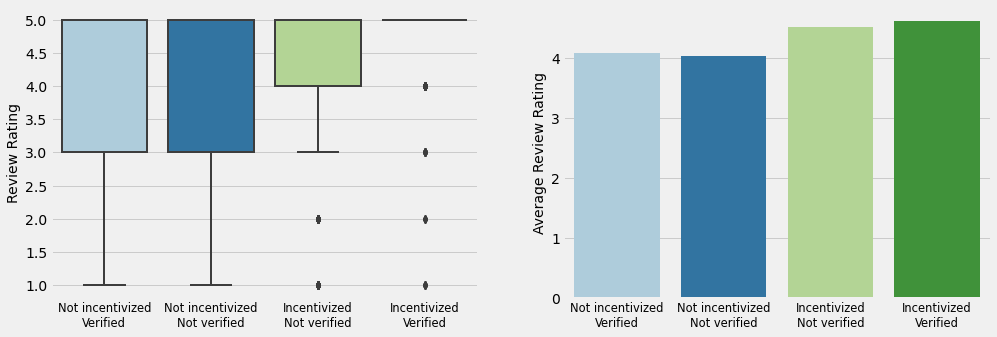

In [233]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(data = df, x = 'inc_ver', y = 'review_rating', ax = axs[0], palette="Paired",linewidth=2)
sns.barplot(data = df, x = 'inc_ver', y = 'review_rating', ci = None, ax = axs[1], palette="Paired")
axs[0].set_xlabel("", fontsize = 15) 
axs[0].set_ylabel("Review Rating", fontsize = 14)
axs[0].tick_params('x', labelsize = 11.5)
axs[1].set_xlabel("", fontsize = 15)
axs[1].set_ylabel("Average Review Rating", fontsize = 14) 
axs[1].tick_params('x', labelsize = 11.5)
plt.show()

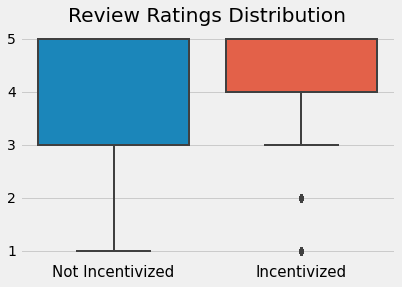

In [234]:
sns.boxplot(data = df[(df['inc_ver'] =='Incentivized\nNot verified')|(df['inc_ver'] =='Not incentivized\nVerified')],
            x = 'inc_ver', y = 'review_rating',linewidth=2).set_title('Review Ratings Distribution')

plt.xlabel("", fontsize = 15) 
plt.ylabel("", fontsize = 15) 
plt.xticks(fontsize = 15, ticks = [0,1], labels = ['Not Incentivized','Incentivized'])
plt.show()

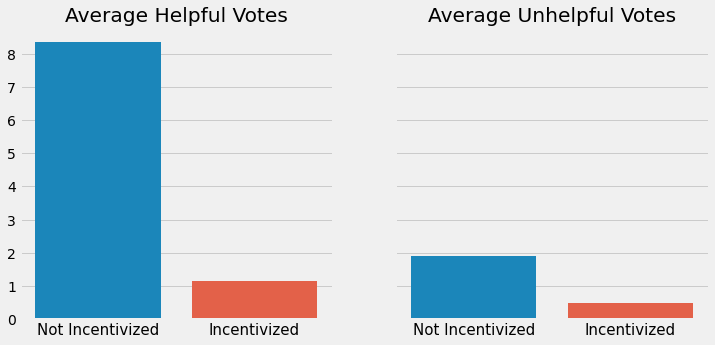

In [235]:
fig, axs = plt.subplots(1, 2, figsize=(11,5), sharey=True)
sns.barplot(data = df[(df['inc_ver'] =='Incentivized\nNot verified')|(df['inc_ver'] =='Not incentivized\nVerified')], x = 'inc_ver', y = 'helpful_votes', ci = None, ax = axs[0]).set_title('Average Helpful Votes')
sns.barplot(data = df[(df['inc_ver'] =='Incentivized\nNot verified')|(df['inc_ver'] =='Not incentivized\nVerified')], x = 'inc_ver', y = 'not_helpful_votes', ci = None, ax = axs[1]).set_title('Average Unhelpful Votes')
axs[0].set_xlabel("", fontsize = 15) 
axs[0].set_ylabel("", fontsize = 15)
axs[0].tick_params('x', labelsize = 15)
axs[1].set_xlabel("", fontsize = 15)
axs[1].set_ylabel("", fontsize = 15) 
axs[1].tick_params('x', labelsize = 15)
axs[0].set_xticklabels(['Not Incentivized','Incentivized'], fontsize = 15)
axs[1].set_xticklabels(['Not Incentivized','Incentivized'], fontsize = 15)

plt.show()

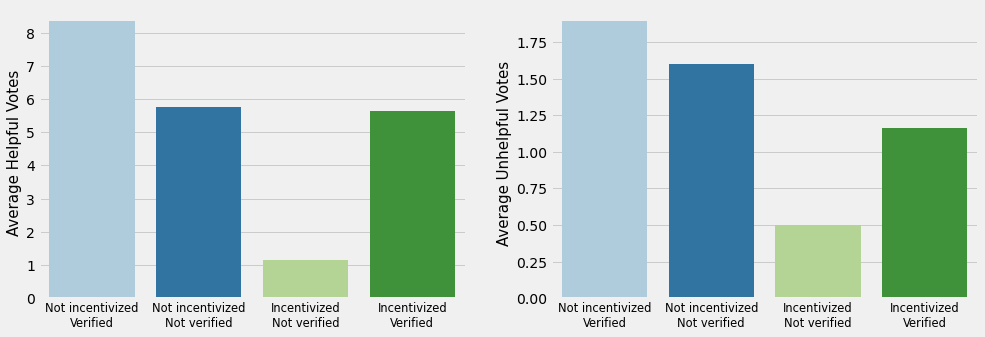

In [236]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(data = df, x = 'inc_ver', y = 'helpful_votes', ci = None, ax = axs[0], palette="Paired")
sns.barplot(data = df, x = 'inc_ver', y = 'not_helpful_votes', ci = None, ax = axs[1], palette="Paired")
axs[0].set_xlabel("", fontsize = 15) 
axs[0].set_ylabel("Average Helpful Votes", fontsize = 15)
axs[0].tick_params('x', labelsize = 11.5)
axs[1].set_xlabel("", fontsize = 15)
axs[1].set_ylabel("Average Unhelpful Votes", fontsize = 15) 
axs[1].tick_params('x', labelsize = 11.5)
plt.show()

In [36]:
print(df[(df['incentivized'] == 0)&(df['verified_purchase'] == 0)].shape[0])
print(df[(df['incentivized'] == 0)&(df['verified_purchase'] == 1)].shape[0])
print(df[(df['incentivized'] == 1)&(df['verified_purchase'] == 1)].shape[0])
print(df[(df['incentivized'] == 1)&(df['verified_purchase'] == 0)].shape[0])
print(df[(df['incentivized'] == 1)&(df['verified_purchase'] == 0)&(df['sephora_employee'] == 1)].shape[0])

100979
16928
417
66008
568


In [37]:
print(f'incentivized: {df["incentivized"].value_counts()[1]}')
print(f'verified purchase: {df["verified_purchase"].value_counts()[1]}')
print(f'sephora employee: {df["sephora_employee"].value_counts()[1]}')

incentivized: 66425
verified purchase: 17345
sephora employee: 1626


In [38]:
df['review_title'] = df['review_title'].fillna('')

In [39]:
df['review'] = df['review_title'] + '. ' + df['review_text']
df.sample(1)

,item_id,product,brand,total_reviews,user_name,review_title,review_text,review_rating,helpful_votes,not_helpful_votes,verified_purchase,sephora_employee,incentivized,inc_ver,review
102236,654806,Essential-C Toner,Murad,271,ZillaRhi,Great Toner,I started using this toner about a month ago a...,4.0,1.0,0.0,0,0,0,Not incentivized\nNot verified,Great Toner. I started using this toner about ...


In [40]:
verified_df = df[(df['incentivized'] == 0)&(df['verified_purchase'] == 1)]
incentivized_df = df[(df['incentivized'] == 1)&(df['verified_purchase'] == 0)]
df_cleaned = pd.concat([verified_df,incentivized_df])

In [41]:
df_cleaned.isna().sum()

item_id                0
product                0
brand                  0
total_reviews         32
user_name            967
review_title           0
review_text            0
review_rating          0
helpful_votes          0
not_helpful_votes      0
verified_purchase      0
sephora_employee       0
incentivized           0
inc_ver                0
review                 0
dtype: int64

In [42]:
df_cleaned['incentivized'].value_counts()

1    66008
0    16928
Name: incentivized, dtype: int64

In [43]:
df_cleaned['verified_purchase'].value_counts()

0    66008
1    16928
Name: verified_purchase, dtype: int64

In [44]:
df_cleaned.to_csv('sephora_data_cleaned.csv', index = False)

# Baseline

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [46]:
df = pd.read_csv('sephora_data_cleaned.csv')

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [47]:
df.sample(1)

,item_id,product,brand,total_reviews,user_name,review_title,review_text,review_rating,helpful_votes,not_helpful_votes,verified_purchase,sephora_employee,incentivized,inc_ver,review
33787,2229839,Noni Bright Vitamin C Serum,KORA Organics,381,FariaT,Organic Love!,I developed organic love for Kora products. Th...,5.0,0.0,0.0,0,0,1,Incentivized\nNot verified,Organic Love!. I developed organic love for Ko...


In [48]:
X = df[['review']]
y = df['incentivized']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
# X = df['review_text'].to_numpy()
# y = df['incentivized'].to_numpy()

In [50]:
X_train.shape

(66348, 1)

#### Random Basline

In [51]:
y_pred_rand = np.random.randint(low=0, high=2, size=(len(X_test)))

In [52]:
metrics_rand = precision_recall_fscore_support(y_test, y_pred_rand, average="weighted")

#### Most Frequent Class

In [53]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_freq = dummy_clf.predict(X_test)

In [54]:
metrics_freq = precision_recall_fscore_support(y_test, y_pred_freq, average="weighted")

/home/michengz/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Review Rating Threshold

In [55]:
y_pred_thres = df['review_rating'] == 5
true_y = df['incentivized'] == 1

In [56]:
metrics_thres = precision_recall_fscore_support(true_y, y_pred_thres, average="weighted")

In [58]:
df_score = pd.DataFrame({'Metrics':['F1','Accuracy'],
                    'Most Frequent':[metrics_freq[2],accuracy_score(y_test,y_pred_freq)],
                    'Random':[metrics_rand[2],accuracy_score(y_test,y_pred_rand)],
                    'Rating Threshold':[metrics_thres[2],accuracy_score(true_y,y_pred_thres)]})
df_score = df_score.set_index('Metrics')
df_score 

,Most Frequent,Random,Rating Threshold
Metrics,,,
F1,0.708662,0.550056,0.645743
Accuracy,0.798228,0.501266,0.614679


In [60]:
# dfi.export(df_score, 'baseline_df.png')

# Tokenization

In [61]:
import string 
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer


In [62]:
X_train_lst = X_train['review'].tolist()

In [63]:
X_test_lst = X_test['review'].tolist()

In [64]:
tokenizer = TweetTokenizer()
lemmatizer = WordNetLemmatizer()
puctuations = set(string.punctuation)
puctuations.update(['..','’','...','…']) 

def tokenize(text):
    tokenized_words = []
    word_lst = tokenizer.tokenize(text) # tokenize
    for word in word_lst:
        word = word.lower()
        if word not in puctuations: # remove punctuations
            lemmatized = lemmatizer.lemmatize(word) # lemmatize
            tokenized_words.append(lemmatized)
    return tokenized_words

In [65]:
df['review'].apply(tokenize)

0        [too, thick, and, sticky, more, like, a, stick...
1        [been, using, this, cream, for, over, 30, year...
2        [the, best, for, night, use, this, product, ha...
3        [worth, every, dollar, i, used, this, in, my, ...
4        [just, ok, some, what, disappointing, for, the...
                               ...                        
82931    [i, have, used, this, product, morning, and, n...
82932    [i, love, this, serum, okay, just, wow, i, lov...
82933    [just, wowwww, i, have, been, using, this, in,...
82934    [all, aboard, the, hydration, train, i, have, ...
82935    [amazing, serum, i, have, dry, skin, and, this...
Name: review, Length: 82936, dtype: object

In [66]:
# Total number of words we are going work with
df['review'].apply(tokenize).apply(lambda x: len(x)).sum()

5497650

# TF-IDF Tranformation

References:
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [67]:
tfidf = TfidfVectorizer(tokenizer = tokenize, stop_words = 'english')
X_train_transformed = tfidf.fit_transform(X_train['review'].to_list())
X_test_transformed = tfidf.transform(X_test['review'].to_list())

/home/michengz/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [68]:
X_train_transformed

<66348x23785 sparse matrix of type '<class 'numpy.float64'>'
	with 1818108 stored elements in Compressed Sparse Row format>

In [69]:
X_test_transformed

<16588x23785 sparse matrix of type '<class 'numpy.float64'>'
	with 453554 stored elements in Compressed Sparse Row format>

In [70]:
#tfidf.get_feature_names()

In [71]:
tfidf_bi = TfidfVectorizer(tokenizer = tokenize, stop_words = 'english', ngram_range = (1, 2))
X_train_transformed_bi = tfidf_bi.fit_transform(X_train['review'].to_list())
X_test_transformed_bi = tfidf_bi.transform(X_test['review'].to_list())

In [72]:
X_train_transformed_bi

<66348x517330 sparse matrix of type '<class 'numpy.float64'>'
	with 3857160 stored elements in Compressed Sparse Row format>

In [73]:
X_test_transformed_bi

<16588x517330 sparse matrix of type '<class 'numpy.float64'>'
	with 887977 stored elements in Compressed Sparse Row format>

In [74]:
#tfidf_bi.get_feature_names()

# Naive Bayes

References:
- https://scikit-learn.org/stable/modules/naive_bayes.html
- https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from time import time

In [76]:
t = time()

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_transformed, y_train)

training_time = time() - t
print("train time: %0.3fs" % training_time)

train time: 0.025s


In [77]:
y_pred_nb = naive_bayes_classifier.predict(X_test_transformed)
y_pred_nb

array([1, 1, 1, ..., 1, 1, 1])

In [78]:
y_proba_nb = naive_bayes_classifier.predict_proba(X_test_transformed)
y_proba_nb

array([[0.03552748, 0.96447252],
       [0.07944555, 0.92055445],
       [0.02318616, 0.97681384],
       ...,
       [0.02688494, 0.97311506],
       [0.06384224, 0.93615776],
       [0.31090004, 0.68909996]])

In [79]:
score1 = metrics.accuracy_score(y_test, y_pred_nb)
score1 

0.8207137689896311

In [80]:
metrics_NB = precision_recall_fscore_support(y_test, y_pred_nb, average="weighted")
metrics_NB

(0.8267791147328402, 0.8207137689896311, 0.764012573996722, None)

In [81]:
df_score['Naive Bayes'] = [metrics_NB[2],accuracy_score(y_test, y_pred_nb)]
df_score

,Most Frequent,Random,Rating Threshold,Naive Bayes
Metrics,,,,
F1,0.708662,0.550056,0.645743,0.764013
Accuracy,0.798228,0.501266,0.614679,0.820714


In [82]:
t = time()

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_transformed_bi, y_train)

training_time = time() - t
print("train time: %0.3fs" % training_time)

train time: 0.062s


In [83]:
# Training on Bi-gram Based TF-IDF
y_pred_nb_bi = naive_bayes_classifier.predict(X_test_transformed_bi)
y_pred_nb_bi

array([1, 1, 1, ..., 1, 1, 1])

In [84]:
metrics_NB_bi = precision_recall_fscore_support(y_test, y_pred_nb_bi, average="weighted")
df_score['Naive Bayes (Bigram)'] = [metrics_NB_bi[2],accuracy_score(y_test, y_pred_nb_bi)]
df_score

,Most Frequent,Random,Rating Threshold,Naive Bayes,Naive Bayes (Bigram)
Metrics,,,,,
F1,0.708662,0.550056,0.645743,0.764013,0.710101
Accuracy,0.798228,0.501266,0.614679,0.820714,0.798830


# SVM

References:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [85]:
from sklearn.linear_model import SGDClassifier

In [86]:
t = time()

sgd_classifier = SGDClassifier(loss='hinge', random_state = 42)
sgd_classifier.fit(X_train_transformed, y_train)

training_time = time() - t
print("train time: %0.3fs" % training_time)

train time: 0.173s


In [87]:
y_pred_svm = sgd_classifier.predict(X_test_transformed)
y_pred_svm

array([1, 1, 1, ..., 1, 1, 1])

In [88]:
y_proba_svm = sgd_classifier.decision_function(X_test_transformed)
y_proba_svm

array([1.38245349, 1.21043898, 2.18021004, ..., 1.89978784, 1.05465664,
       0.14146681])

In [89]:
metrics_svm = precision_recall_fscore_support(y_test, y_pred_svm, average="weighted")
df_score['SVM'] = [metrics_svm[2],accuracy_score(y_test, y_pred_svm)]
df_score

,Most Frequent,Random,Rating Threshold,Naive Bayes,Naive Bayes (Bigram),SVM
Metrics,,,,,,
F1,0.708662,0.550056,0.645743,0.764013,0.710101,0.838749
Accuracy,0.798228,0.501266,0.614679,0.820714,0.798830,0.860080


In [90]:
t = time()

sgd_classifier = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state = 42)
sgd_classifier.fit(X_train_transformed_bi, y_train)

training_time = time() - t
print("train time: %0.3fs" % training_time)

train time: 0.299s


In [91]:
y_pred_svm_bi = sgd_classifier.predict(X_test_transformed_bi)
y_pred_svm_bi

array([1, 1, 1, ..., 1, 1, 1])

In [92]:
metrics_svm_bi = precision_recall_fscore_support(y_test, y_pred_svm_bi, average="weighted")
df_score['SVM (Bigram)'] = [metrics_svm_bi[2],accuracy_score(y_test, y_pred_svm_bi)]
df_score

,Most Frequent,Random,Rating Threshold,Naive Bayes,Naive Bayes (Bigram),SVM,SVM (Bigram)
Metrics,,,,,,,
F1,0.708662,0.550056,0.645743,0.764013,0.710101,0.838749,0.792707
Accuracy,0.798228,0.501266,0.614679,0.820714,0.798830,0.860080,0.835483


# Logistic Regression

References:
- http://michael-harmon.com/blog/NLP2.html

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
log_reg = Pipeline([
        ("vect", TfidfVectorizer(tokenizer = tokenize, stop_words = 'english')),
        ("tfidf", TfidfTransformer()),
        ("clf", LogisticRegression(solver='liblinear')),
    ])

In [95]:
log_reg.fit(X_train['review'].to_list(), y_train)

/home/michengz/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Pipeline(steps=[('vect',
                 TfidfVectorizer(stop_words='english',
                                 tokenizer=<function tokenize at 0x2ba0ebb30940>)),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(solver='liblinear'))])

In [96]:
y_pred_logreg = log_reg.predict(X_test['review'].to_list())
y_pred_logreg

array([1, 1, 1, ..., 1, 1, 0])

In [97]:
y_proba_logreg = log_reg.predict_proba(X_test['review'].to_list())
y_proba_logreg

array([[0.04710858, 0.95289142],
       [0.13901075, 0.86098925],
       [0.00720437, 0.99279563],
       ...,
       [0.01582981, 0.98417019],
       [0.19482321, 0.80517679],
       [0.53840059, 0.46159941]])

In [98]:
metrics_logreg = precision_recall_fscore_support(y_test, y_pred_logreg, average="weighted")
df_score['Logistic Regression'] = [metrics_logreg[2],accuracy_score(y_test, y_pred_logreg)]
df_score

,Most Frequent,Random,Rating Threshold,Naive Bayes,Naive Bayes (Bigram),SVM,SVM (Bigram),Logistic Regression
Metrics,,,,,,,,
F1,0.708662,0.550056,0.645743,0.764013,0.710101,0.838749,0.792707,0.856554
Accuracy,0.798228,0.501266,0.614679,0.820714,0.798830,0.860080,0.835483,0.868580


In [99]:
log_reg_bi = Pipeline([
        ("vect", TfidfVectorizer(tokenizer = tokenize, stop_words = 'english', ngram_range = (1, 2))),
        ("tfidf", TfidfTransformer()),
        ("clf", LogisticRegression(solver='liblinear')),
    ])

In [100]:
log_reg_bi.fit(X_train['review'].to_list(), y_train)
y_pred_logreg_bi = log_reg_bi.predict(X_test['review'].to_list())
y_pred_logreg_bi

/home/michengz/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


array([1, 1, 1, ..., 1, 1, 0])

In [101]:
metrics_logreg_bi = precision_recall_fscore_support(y_test, y_pred_logreg_bi, average="weighted")
df_score['Logistic Regression (Bigram)'] = [metrics_logreg_bi[2],accuracy_score(y_test, y_pred_logreg_bi)]
df_score

,Most Frequent,Random,Rating Threshold,Naive Bayes,Naive Bayes (Bigram),SVM,SVM (Bigram),Logistic Regression,Logistic Regression (Bigram)
Metrics,,,,,,,,,
F1,0.708662,0.550056,0.645743,0.764013,0.710101,0.838749,0.792707,0.856554,0.824860
Accuracy,0.798228,0.501266,0.614679,0.820714,0.798830,0.860080,0.835483,0.868580,0.853207


# LSTM

References: 
- https://jovian.ai/aakanksha-ns/lstm-multiclass-text-classification
- https://towardsdatascience.com/lstm-text-classification-using-pytorch-2c6c657f8fc0
- https://androidkt.com/text-classification-in-pytorch/

In [1]:
# !pip install -U torch==1.8.0 torchtext==0.9.0
# exit()

In [102]:
import torchtext
import torch
from torchtext.legacy import data#, Field, TabularDataset, BucketIterator
from torchtext.legacy import datasets
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm_notebook
from torch.utils.tensorboard import SummaryWriter
torch.manual_seed(42)

In [103]:
train_df = pd.DataFrame({'labels':y_train, 'text':X_train['review']})
test_df = pd.DataFrame({'labels':y_test, 'text':X_test['review']})
train_df.to_csv('train.csv', index = False)
test_df.to_csv('test.csv', index = False)

In [104]:
TEXT = data.Field(tokenize=tokenize, stop_words='english', batch_first=True,include_lengths=True)
LABEL = data.LabelField(dtype = torch.float,batch_first=True)
#

In [105]:
fields = [("labels",LABEL),('text',TEXT)]

In [106]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/michengz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [107]:
train_data = data.TabularDataset(path = "train.csv",
                                format = "csv",
                                fields = fields,
                                skip_header = True
                                )
test_data = data.TabularDataset(path = "test.csv",
                                format = "csv",
                                fields = fields,
                                skip_header = True
                                )

In [108]:
print(vars(train_data.examples[0]))
print(vars(test_data.examples[0]))

{'labels': '1', 'text': ['it', 'make', 'your', 'skin', 'look', 'very', 'naturally', 'dewy', 'which', 'like', 'if', 'you', "don't", 'like', 'the', 'lasting', 'dewy', 'look', 'this', 'may', 'not', 'be', 'for', 'you', 'why', 'not', '5', 'star', 'would', 'rather', 'have', 'this', 'a', 'a', 'dropper', 'so', 'can', 'put', 'it', 'directly', 'on', 'my', 'face', 'right', 'now', 'it', 'squirt', 'out', 'fast', 'and', 'through', 'my', 'finger', 'onto', 'the', 'counter']}
{'labels': '1', 'text': ['d', 'say', 'out', 'of', 'the', 'entire', 'collection', 'this', 'is', 'just', 'hyaluronic', 'serum', 'and', 'you', 'can', 'find', 'a', 'serum', 'just', 'a', 'good', 'if', 'not', 'better', 'that', 'wouldn', 't', 'cost', '300', 'it', 'doe', 'plump', 'my', 'skin', 'and', 'make', 'it', 'soft', 'but', 'don', 't', 'think', 'this', 'is', 'the', 'best']}


In [109]:
TEXT.build_vocab(train_data, min_freq = 5)
LABEL.build_vocab(train_data)

In [110]:
# Pretrained Embeddings
# TEXT.vocab.load_vectors('glove.6B.300d')
# embedding = TEXT.vocab.vectors.to(device)

In [111]:
print("Size of text vocab:",len(TEXT.vocab))
print("Size of label vocab:",len(LABEL.vocab))
print("Most common vocabs:", TEXT.vocab.freqs.most_common(20))

Size of text vocab: 8155
Size of label vocab: 2
Most common vocabs: [('it', 157544), ('and', 152403), ('a', 136001), ('the', 135244), ('my', 118448), ('this', 111788), ('skin', 87776), ('to', 80753), ('is', 70707), ('for', 55805), ('product', 54930), ('of', 44540), ('in', 38929), ('but', 38656), ('so', 36618), ('that', 36543), ('have', 35889), ('love', 33228), ('on', 32898), ('with', 31753)]


In [112]:
batch_size = 32

In [113]:
# Creating Batches through Iterator
train_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, test_data), 
    batch_size = batch_size,
    sort_key = lambda x: len(x.text),
    sort_within_batch = True)

In [114]:
# Constructing an LSTM Network

class LSTM(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout, bidirectional):
        super(LSTM, self).__init__()
        
        # Embedding Layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        #self.embeddings = nn.Embedding.from_pretrained(embedding_weights) # pretrained embeddings
        
        # LSTM Layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim,
                            num_layers = num_layers,
                            bidirectional = bidirectional,
                            batch_first = True,
                            dropout = dropout)
        
        # Linear Layer 
        self.linear = nn.Linear(hidden_dim * 2, 1)  # (hidden_dim * 2, label size)

    def forward(self, text, text_length):
        
        # getting the embeddings and pack sequence
        text_embedded = self.embedding(text) 
        packed_embedded = nn.utils.rnn.pack_padded_sequence(text_embedded, text_length, batch_first = True)
        
        # passing embeddings through LSTM
        packed_outputs, (hidden, cell) = self.lstm(packed_embedded)
        # concatenating the last hidden states of the two LSTMs (forward & backward)
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1) # hidden state shape: [2 layers * 2 directions, batch, hidden_size]
        
        # passing through linear layer
        dense_outputs = self.linear(hidden)
        
        # sigmoid to get final output
        outputs = torch.sigmoid(dense_outputs)
        
        return outputs

In [115]:
# Model Parameters
vocab_size = len(TEXT.vocab)
embedding_dim = 100
hidden_dim = 25
num_layers = 2
dropout = 0.2

In [118]:
# Instantiating LSTM Model
model = LSTM(vocab_size = vocab_size, 
             embedding_dim = embedding_dim, 
             hidden_dim = hidden_dim,
             num_layers = num_layers, 
             dropout = dropout,
             bidirectional = True)

In [116]:
def evaluate(model, test_iterator):
    y_pred = []
    y_true = []

    model.eval()
    with torch.no_grad():
        for i, batch in tqdm_notebook(enumerate(test_iterator)):
            (feature, batch_length), label = batch.text, batch.labels # inputs
            output = model(feature, batch_length).squeeze()
            
            output = (output > 0.5).int()
            y_pred.extend(output.tolist())
            y_true.extend(label.tolist())
            
    precision, recall, f1, acc = precision_recall_fscore_support(y_true,y_pred, average="weighted")
    accuracy = accuracy_score(y_true,y_pred)
    return [precision, recall, f1, accuracy]

In [1496]:
# Training 
loss_history = []
f1_history = []
scores_history = []
final_scores = []
training_acc = []
optimizer = optim.Adam(model.parameters(),lr = 1e-4)
criterion = nn.BCELoss()
writer = SummaryWriter()

def train(model,optimizer,epochs):
    running_loss = 0.0   
    step = 0
    
    for epoch in range(epochs):
        train_preds = []
        train_trues = []
        
        for i, batch in tqdm_notebook(enumerate(train_iterator)):
            (feature, batch_length), label = batch.text, batch.labels

            optimizer.zero_grad()

            output = model(feature, batch_length).squeeze() 

            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            
            step += 1
            
            # Training Predictions
            train_output = (output > 0.5).int()
            train_preds.extend(train_output.tolist())
            train_trues.extend(label.tolist())
            
            # Evaluation
            running_loss += loss.item()
            if i % 1000 == 999:
                
                # Calculating Training Accuracy
                t_acc = accuracy_score(train_trues,train_preds)
                training_acc.append(t_acc)
                
                # Calculate Scores
                scores = evaluate(model, test_iterator)
                f1_history.append(scores[2])
                scores_history.append(scores)
                print(f'f1 score: {scores[2]}')
                
                # Calculating Running Loss
                loss_history.append(running_loss)
                print(f'[{epoch + 1}, {step}] Training Loss: {running_loss:.5f}')
                print(f'[{epoch + 1}, {step}] Training Accuracy: {t_acc:.5f}')
                print(f'[{epoch + 1}, {step}] Validation Accuracy: {scores[3]:.5f}')
                writer.add_scalar("Running Loss / 1000 Steps", running_loss, step)
                running_loss = 0.0 
                
                model.train()
                
    final_scores.extend(scores)

In [1497]:
train(model = model, optimizer = optimizer, epochs = 12)
writer.flush()

0it [00:00, ?it/s]

0it [00:00, ?it/s]

/Users/michellecheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  -------


f1 score: 0.7086615111165393
[1, 1000] Training Loss: 506.85518
[1, 1000] Training Accuracy: 0.79438
[1, 1000] Validation Accuracy: 0.79823


0it [00:00, ?it/s]

f1 score: 0.7414887097520392
[1, 2000] Training Loss: 416.11004
[1, 2000] Training Accuracy: 0.79683
[1, 2000] Validation Accuracy: 0.80811


0it [00:00, ?it/s]

0it [00:00, ?it/s]

f1 score: 0.7887613853002976
[2, 3074] Training Loss: 401.97719
[2, 3074] Training Accuracy: 0.81806
[2, 3074] Validation Accuracy: 0.82355


0it [00:00, ?it/s]

f1 score: 0.8083796927566069
[2, 4074] Training Loss: 369.43271
[2, 4074] Training Accuracy: 0.82048
[2, 4074] Validation Accuracy: 0.83187


0it [00:00, ?it/s]

0it [00:00, ?it/s]

f1 score: 0.8295119861120123
[3, 5148] Training Loss: 373.42421
[3, 5148] Training Accuracy: 0.83750
[3, 5148] Validation Accuracy: 0.83609


0it [00:00, ?it/s]

f1 score: 0.8339854059362214
[3, 6148] Training Loss: 339.10065
[3, 6148] Training Accuracy: 0.84069
[3, 6148] Validation Accuracy: 0.84254


0it [00:00, ?it/s]

0it [00:00, ?it/s]

f1 score: 0.8383582603312283
[4, 7222] Training Loss: 346.91871
[4, 7222] Training Accuracy: 0.85022
[4, 7222] Validation Accuracy: 0.84453


0it [00:00, ?it/s]

f1 score: 0.8416282806409829
[4, 8222] Training Loss: 323.26429
[4, 8222] Training Accuracy: 0.85036
[4, 8222] Validation Accuracy: 0.84814


0it [00:00, ?it/s]

0it [00:00, ?it/s]

f1 score: 0.8469677518654567
[5, 9296] Training Loss: 334.22560
[5, 9296] Training Accuracy: 0.85606
[5, 9296] Validation Accuracy: 0.85272


0it [00:00, ?it/s]

f1 score: 0.8490169154051889
[5, 10296] Training Loss: 306.45401
[5, 10296] Training Accuracy: 0.85788
[5, 10296] Validation Accuracy: 0.85068


0it [00:00, ?it/s]

0it [00:00, ?it/s]

f1 score: 0.851442397152674
[6, 11370] Training Loss: 320.42733
[6, 11370] Training Accuracy: 0.86241
[6, 11370] Validation Accuracy: 0.84911


0it [00:00, ?it/s]

f1 score: 0.853820831091467
[6, 12370] Training Loss: 293.98599
[6, 12370] Training Accuracy: 0.86413
[6, 12370] Validation Accuracy: 0.85423


0it [00:00, ?it/s]

0it [00:00, ?it/s]

f1 score: 0.8547287119665692
[7, 13444] Training Loss: 312.84576
[7, 13444] Training Accuracy: 0.86959
[7, 13444] Validation Accuracy: 0.85652


0it [00:00, ?it/s]

f1 score: 0.8523248670151554
[7, 14444] Training Loss: 284.21720
[7, 14444] Training Accuracy: 0.87070
[7, 14444] Validation Accuracy: 0.85713


0it [00:00, ?it/s]

0it [00:00, ?it/s]

f1 score: 0.8562119016675698
[8, 15518] Training Loss: 297.91510
[8, 15518] Training Accuracy: 0.87441
[8, 15518] Validation Accuracy: 0.85598


0it [00:00, ?it/s]

f1 score: 0.8565512927492506
[8, 16518] Training Loss: 276.05017
[8, 16518] Training Accuracy: 0.87562
[8, 16518] Validation Accuracy: 0.86068


0it [00:00, ?it/s]

0it [00:00, ?it/s]

f1 score: 0.8519757926224194
[9, 17592] Training Loss: 291.64079
[9, 17592] Training Accuracy: 0.87947
[9, 17592] Validation Accuracy: 0.86044


0it [00:00, ?it/s]

f1 score: 0.8603682897154511
[9, 18592] Training Loss: 268.38083
[9, 18592] Training Accuracy: 0.87892
[9, 18592] Validation Accuracy: 0.86430


0it [00:00, ?it/s]

0it [00:00, ?it/s]

f1 score: 0.8584408101868953
[10, 19666] Training Loss: 274.96989
[10, 19666] Training Accuracy: 0.88647
[10, 19666] Validation Accuracy: 0.86394


0it [00:00, ?it/s]

f1 score: 0.8627099414301032
[10, 20666] Training Loss: 267.11463
[10, 20666] Training Accuracy: 0.88361
[10, 20666] Validation Accuracy: 0.86122


0it [00:00, ?it/s]

0it [00:00, ?it/s]

f1 score: 0.8605566355544388
[11, 21740] Training Loss: 273.67369
[11, 21740] Training Accuracy: 0.88794
[11, 21740] Validation Accuracy: 0.86418


0it [00:00, ?it/s]

f1 score: 0.860488842755941
[11, 22740] Training Loss: 253.24959
[11, 22740] Training Accuracy: 0.88745
[11, 22740] Validation Accuracy: 0.86514


0it [00:00, ?it/s]

0it [00:00, ?it/s]

f1 score: 0.8602003034468607
[12, 23814] Training Loss: 265.17523
[12, 23814] Training Accuracy: 0.89228
[12, 23814] Validation Accuracy: 0.86538


0it [00:00, ?it/s]

f1 score: 0.8636763978408148
[12, 24814] Training Loss: 249.00930
[12, 24814] Training Accuracy: 0.89253
[12, 24814] Validation Accuracy: 0.86400


In [1499]:
final_scores

[0.8633690190934936,
 0.8639980708946227,
 0.8636763978408148,
 0.8639980708946227]

In [1500]:
f1_history

[0.7086615111165393,
 0.7414887097520392,
 0.7887613853002976,
 0.8083796927566069,
 0.8295119861120123,
 0.8339854059362214,
 0.8383582603312283,
 0.8416282806409829,
 0.8469677518654567,
 0.8490169154051889,
 0.851442397152674,
 0.853820831091467,
 0.8547287119665692,
 0.8523248670151554,
 0.8562119016675698,
 0.8565512927492506,
 0.8519757926224194,
 0.8603682897154511,
 0.8584408101868953,
 0.8627099414301032,
 0.8605566355544388,
 0.860488842755941,
 0.8602003034468607,
 0.8636763978408148]

### Saving and Loading LSTM Model

In [1498]:
# torch.save(model.state_dict(), 'LSTM_model_4')

In [119]:
model.load_state_dict(torch.load('LSTM_model_4'))
model.eval()

LSTM(
  (embedding): Embedding(8155, 100)
  (lstm): LSTM(100, 25, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [1341]:
scores_dict = {}
scores_dict['Precision'] = []
scores_dict['Recall'] = []
scores_dict['F1'] = []
scores_dict['Accuracy'] = []
for checkpoint in scores_history: 
    scores_dict['Precision'].append(checkpoint[0])
    scores_dict['Recall'].append(checkpoint[1])
    scores_dict['F1'].append(checkpoint[2])
    scores_dict['Accuracy'].append(checkpoint[3])
df_LSTM_scores = pd.DataFrame(scores_dict)

In [1502]:
training_acc

[0.794375,
 0.796828125,
 0.8180625,
 0.820484375,
 0.8375,
 0.8406875,
 0.85021875,
 0.850359375,
 0.8560625,
 0.857875,
 0.86240625,
 0.864125,
 0.86959375,
 0.870703125,
 0.87440625,
 0.875625,
 0.87946875,
 0.878921875,
 0.88646875,
 0.883609375,
 0.8879375,
 0.887453125,
 0.89228125,
 0.89253125]

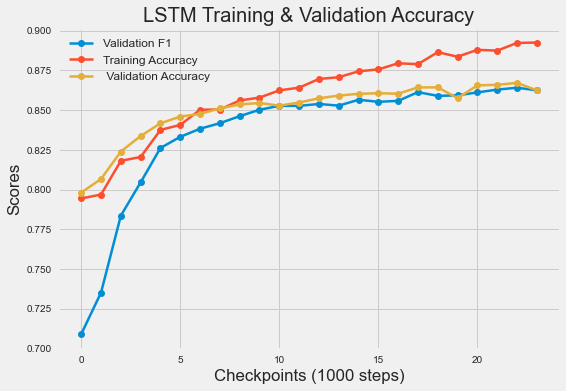

In [1510]:
plt.xlabel("Checkpoints (1000 steps)")
plt.ylabel("Scores")
#plt.axis([-0.8, max(df_LSTM_scores.index)+0.8, 0, 1])
plt.title('LSTM Training & Validation Accuracy')
#plt.plot(df_LSTM_scores.index, df_LSTM_scores['Precision'],label="Precision", marker='o')
#plt.plot(df_LSTM_scores.index, df_LSTM_scores['Recall'], label="Recall", marker='o')
plt.plot(df_LSTM_scores.index, df_LSTM_scores['F1'], label="Validation F1", marker='o',linewidth=2.5)
plt.plot(df_LSTM_scores.index, training_acc, label="Training Accuracy", marker='o',linewidth=2.5)
plt.plot(df_LSTM_scores.index, df_LSTM_scores['Accuracy'], label=" Validation Accuracy", marker='o',linewidth=2.5)


plt.legend(loc='best', prop={'size': 12})
plt.show()

In [121]:
def predict(model, test_iter):
    y_pred = []
    y_true = []
    y_proba = []
    model.eval()
    with torch.no_grad():
        for i, batch in tqdm_notebook(enumerate(test_iter)):
            (feature, batch_length), label = batch.text, batch.labels # inputs
            output = model(feature, batch_length).squeeze()
            y_proba.extend(output.tolist())
            output = (output > 0.5).int()
            y_pred.extend(output.tolist())
            y_true.extend(label.tolist())
            
    return y_pred, y_true, y_proba

In [122]:
y_pred,y_true, y_proba = predict(model, test_iterator)

0it [00:00, ?it/s]

In [125]:
df_prediction_svm = pd.DataFrame({'y_pred':y_pred,'y_true':y_true})
df_prediction_svm['prediction'] = df_prediction_svm['y_pred'].apply(lambda x: 1 if x==0 else 0)
df_prediction_svm['true'] = df_prediction_svm['y_true'].apply(lambda x: 1 if x==0 else 0)

In [126]:
df_prediction_svm = df_prediction_svm[['prediction','true']]
df_prediction_svm

,prediction,true
0,1,1
1,1,0
2,1,1
3,0,1
4,0,1
...,...,...
16583,1,1
16584,0,0
16585,0,0
16586,1,1


In [133]:
df_score['LSTM'] = [f1_score(df_prediction_svm['true'],df_prediction_svm['prediction'], average="weighted"),
                    accuracy_score(df_prediction_svm['true'],df_prediction_svm['prediction'])]
df_score

,Most Frequent,Random,Rating Threshold,Naive Bayes,Naive Bayes (Bigram),SVM,SVM (Bigram),Logistic Regression,Logistic Regression (Bigram),LSTM
Metrics,,,,,,,,,,
F1,0.708662,0.550056,0.645743,0.764013,0.710101,0.838749,0.792707,0.856554,0.824860,0.863702
Accuracy,0.798228,0.501266,0.614679,0.820714,0.798830,0.860080,0.835483,0.868580,0.853207,0.864601


# BERT MiniLM Model

References:
- https://discuss.huggingface.co/t/how-to-create-custom-classlabels/13650
- https://discuss.huggingface.co/t/saving-loading-model-in-colab-and-making-predictions/6723
- https://huggingface.co/docs/datasets/loading
- SI630 Assignment 3

In [18]:
#!pip uninstall transformers -y
#!pip uninstall torch -y

In [134]:
# !pip install datasets
# !pip install transformers
# !pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio===0.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [135]:
from tokenizers import Tokenizer
from transformers import AutoTokenizer
from transformers import PreTrainedTokenizerFast

import torch
from torch import nn
from datasets import Dataset, ClassLabel
from transformers import AutoTokenizer, Trainer, AutoModelForSequenceClassification, TrainingArguments
from sklearn.metrics import f1_score
from scipy import stats
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [137]:
df_train.head()

,labels,text
0,1,. It makes your skin look very naturally dewy ...
1,1,New Staple. Absolutely obsessed with this prod...
2,1,Great for morning and night. This serum worked...
3,1,. This product is a luxury. To further explain...
4,1,. After using it for 1 week my skin feels so s...


In [138]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/MiniLM-L12-H384-uncased")
def tokenize_text(examples):
    return tokenizer(examples['text'], truncation=True, max_length=320)

train_dataset = Dataset.from_pandas(df_train)
train_dataset = train_dataset.map(tokenize_text, batched = True)

test_dataset = Dataset.from_pandas(df_test)
test_dataset = test_dataset.map(tokenize_text, batched = True)

  0%|          | 0/67 [00:00<?, ?ba/s]

  0%|          | 0/17 [00:00<?, ?ba/s]

In [139]:
features1 = train_dataset.features.copy()
features1['labels'] = ClassLabel(num_classes = 2)

features2 = test_dataset.features.copy()
features2['labels'] = ClassLabel(num_classes = 2)

train_dataset = train_dataset.map(batched=True, features=features1)
test_dataset = test_dataset.map(batched=True, features=features2)

  0%|          | 0/67 [00:00<?, ?ba/s]

  0%|          | 0/17 [00:00<?, ?ba/s]

In [140]:
train_dataset

Dataset({
    features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 66348
})

In [141]:
test_dataset

Dataset({
    features: ['labels', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 16588
})

In [142]:
class_weights = (1-(df_train['labels'].value_counts().sort_index()/len(df_train))).values
class_weights

array([0.79530657, 0.20469343])

In [143]:
class_weights = torch.from_numpy(class_weights).float().to('cuda')
class_weights

tensor([0.7953, 0.2047], device='cuda:0')

In [48]:
model = AutoModelForSequenceClassification.from_pretrained("microsoft/MiniLM-L12-H384-uncased", 
                                                           num_labels = 2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [144]:
class WeightedLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs = False):
        outputs = model(**inputs)
        logits = outputs.get('logits')
        labels = inputs.get('labels')
        loss_func = nn.CrossEntropyLoss(weight = class_weights, reduction='mean')
        loss = loss_func(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [145]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    return {'f1 score': f1}

In [146]:
batch_size = 32
#logging_steps = len(train_dataset)
output_dir = "minilm_trainer"

training_args = TrainingArguments(
    output_dir = output_dir,
    num_train_epochs = 10,
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    fp16 = True,
    evaluation_strategy='epoch',
    save_steps=2500,
    save_total_limit=10,
    #load_best_model_at_end= True,
    #logging_steps=logging_steps,
)

In [147]:
trainer = WeightedLossTrainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset= test_dataset,
    tokenizer=tokenizer
)

Using amp half precision backend


In [16]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/home/michengz/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 66348
  Num Epochs = 10
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 20740


Epoch,Training Loss,Validation Loss,F1 score
1,0.347700,0.334288,0.880225
2,0.299300,0.370917,0.814461
3,0.248100,0.357905,0.895027
4,0.196200,0.401952,0.895577
5,0.159000,0.475617,0.900224
6,0.128400,0.615603,0.902207
7,0.101600,0.802879,0.900004
8,0.078300,0.788008,0.903461
9,0.060300,0.838879,0.903678
10,0.044400,0.870248,0.902981


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 16588
  Batch size = 32
Saving model checkpoint to minilm_trainer/checkpoint-2500
Configuration saved in minilm_trainer/checkpoint-2500/config.json
Model weights saved in minilm_trainer/checkpoint-2500/pytorch_model.bin
tokenizer config file saved in minilm_trainer/checkpoint-2500/tokenizer_config.json
Special tokens file saved in minilm_trainer/checkpoint-2500/special_tokens_map.json
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples 

TrainOutput(global_step=20740, training_loss=0.1692064943286009, metrics={'train_runtime': 2587.2133, 'train_samples_per_second': 256.446, 'train_steps_per_second': 8.016, 'total_flos': 2.061133794876744e+16, 'train_loss': 0.1692064943286009, 'epoch': 10.0})

In [84]:
trainer.save_model('bert_moel')

Saving model checkpoint to bert_moel
Configuration saved in bert_moel/config.json
Model weights saved in bert_moel/pytorch_model.bin
tokenizer config file saved in bert_moel/tokenizer_config.json
Special tokens file saved in bert_moel/special_tokens_map.json


### Saving & Loading BERT model

In [85]:
# torch.save(model.state_dict(), 'bert_model') 

In [148]:
model = AutoModelForSequenceClassification.from_pretrained("microsoft/MiniLM-L12-H384-uncased", 
                                                           num_labels = 2)
model.load_state_dict(torch.load('bert_model'))

loading configuration file https://huggingface.co/microsoft/MiniLM-L12-H384-uncased/resolve/main/config.json from cache at /home/michengz/.cache/huggingface/transformers/ceb753d3f27a8c0d09184f35884666cda91b8ae610cd2a54d89793ac7663f1f9.13815020fd994b27db9974c0ce0ec4c47dfac6c8f11bf1a35a0a06d5b165665a
Model config BertConfig {
  "_name_or_path": "microsoft/MiniLM-L12-H384-uncased",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file https://huggingface.co/microsoft/MiniLM-L12-H384-uncased/resolve/main/pytorch_model.b

<All keys matched successfully>

In [149]:
trainer = WeightedLossTrainer(model=model,
                              args=training_args,
                              compute_metrics=compute_metrics,
                              train_dataset=train_dataset,
                              eval_dataset= test_dataset,
                              tokenizer=tokenizer
                             )
#trainer.model = model.cuda()

Using amp half precision backend


In [164]:
predictions = trainer.predict(test_dataset)
predictions

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 16588
  Batch size = 32


PredictionOutput(predictions=array([[-3.525,  3.787],
       [-3.451,  3.695],
       [-3.516,  3.773],
       ...,
       [-3.475,  3.72 ],
       [-3.48 ,  3.73 ],
       [-2.941,  3.102]], dtype=float16), label_ids=array([1, 1, 1, ..., 1, 1, 0]), metrics={'test_loss': 0.8702500462532043, 'test_f1 score': 0.9027929056332137, 'test_runtime': 23.1202, 'test_samples_per_second': 717.467, 'test_steps_per_second': 22.448})

In [165]:
y_pred_bert = predictions.predictions.argmax(-1)
y_pred_bert

array([1, 1, 1, ..., 1, 1, 1])

In [171]:
df_bert = pd.DataFrame({'true':test_dataset['labels'],'preds':y_pred_bert})
df_bert

,true,preds
0,1,1
1,1,1
2,1,1
3,1,0
4,1,1
...,...,...
16583,1,1
16584,1,0
16585,1,1
16586,1,1


In [174]:
df_score['BERT MiniLM'] = [f1_score(df_bert['true'],df_bert['preds']),accuracy_score(df_bert['true'],df_bert['preds'])]
df_score

,Most Frequent,Random,Rating Threshold,Naive Bayes,Naive Bayes (Bigram),SVM,SVM (Bigram),Logistic Regression,Logistic Regression (Bigram),LSTM,BERT MiniLM
Metrics,,,,,,,,,,,
F1,0.708662,0.550056,0.645743,0.764013,0.710101,0.838749,0.792707,0.856554,0.824860,0.863702,0.940135
Accuracy,0.798228,0.501266,0.614679,0.820714,0.798830,0.860080,0.835483,0.868580,0.853207,0.864601,0.903786


In [151]:
raw_pred, _, _ = trainer.predict(test_dataset)

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 16588
  Batch size = 32


In [152]:
y_proba_bert = nn.functional.softmax(torch.from_numpy(raw_pred).float(), dim=-1).numpy()

# Evaluating Models

### F1 and Accuracy Scores

In [182]:
# !pip install dataframe_image

In [180]:
df_score.T

Metrics,F1,Accuracy
Most Frequent,0.708662,0.798228
Random,0.550056,0.501266
Rating Threshold,0.645743,0.614679
Naive Bayes,0.764013,0.820714
Naive Bayes (Bigram),0.710101,0.798830
SVM,0.838749,0.860080
SVM (Bigram),0.792707,0.835483
Logistic Regression,0.856554,0.868580
Logistic Regression (Bigram),0.824860,0.853207
LSTM,0.863702,0.864601


In [284]:
df_score[['Naive Bayes','Naive Bayes (Bigram)','SVM','SVM (Bigram)','Logistic Regression','Logistic Regression (Bigram)','LSTM','BERT MiniLM']].T

Metrics,F1,Accuracy
Naive Bayes,0.764013,0.820714
Naive Bayes (Bigram),0.710101,0.798830
SVM,0.838749,0.860080
SVM (Bigram),0.792707,0.835483
Logistic Regression,0.856554,0.868580
Logistic Regression (Bigram),0.824860,0.853207
LSTM,0.863702,0.864601
BERT MiniLM,0.940135,0.903786


### ROC and AUC

In [153]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [154]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [155]:
fpr1, tpr1, thresholds1 = roc_curve(y_true, y_proba)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_proba_logreg[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_proba_svm)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_proba_nb[:,1])
fpr5, tpr5, thresholds5 = roc_curve(test_dataset['labels'], y_proba_bert[:,1])

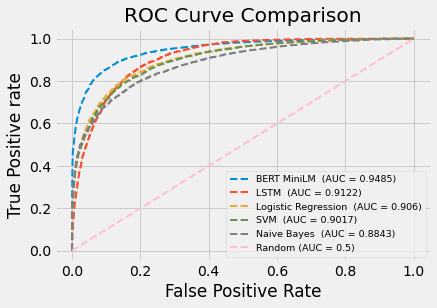

In [262]:
# Plotting ROC Curve
plt.plot(fpr5, tpr5, linestyle='--', label='BERT MiniLM  (AUC = '+str(round(roc_auc_score(test_dataset['labels'], y_proba_bert[:,1]),4))+')',linewidth=2)
plt.plot(fpr1, tpr1, linestyle='--', label='LSTM  (AUC = '+str(round(roc_auc_score(y_true, y_proba),4))+')',linewidth=2)
plt.plot(fpr2, tpr2, linestyle='--', label='Logistic Regression  (AUC = '+str(round(roc_auc_score(y_test, y_proba_logreg[:,1]),4))+')',linewidth=2)
plt.plot(fpr3, tpr3, linestyle='--', label='SVM  (AUC = '+str(round(roc_auc_score(y_test, y_proba_svm),4))+')',linewidth=2)
plt.plot(fpr4, tpr4, linestyle='--', label='Naive Bayes  (AUC = '+str(round(roc_auc_score(y_test, y_proba_nb[:,1]),4))+')',linewidth=2, color = 'gray')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random (AUC = 0.5)',linewidth=2, color = 'pink')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best', prop={'size': 9.5})
plt.show()

# Prediction on Unlabeled Data using the Best Model (BERT)

In [188]:
df_all = pd.read_csv('sephora_review_data.csv')

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [189]:
df_unlabeled = df_all[(df_all['incentivized']==0)&(df_all['verified_purchase']==0)]

In [190]:
df_unlabeled['review_title'] = df_unlabeled['review_title'].fillna('')

In [191]:
df_unlabeled['review'] = df_unlabeled['review_title'] + '. ' + df_unlabeled['review_text']
df_unlabeled.sample(1)

,item_id,product,brand,total_reviews,user_name,review_title,review_text,review_rating,helpful_votes,not_helpful_votes,verified_purchase,sephora_employee,incentivized,review
88341,1840305,Problem Solution Moisturizer,belif,86,tennesseebb,finally a moisturizer for problem skin!!!,it can be so hard to find a great moisturizer ...,5.0,1.0,0.0,0,0,0,finally a moisturizer for problem skin!!!. it ...


In [192]:
df_unlabeled.isna().sum()

item_id                0
product                0
brand                  0
total_reviews         41
user_name            622
review_title           0
review_text          282
review_rating         79
helpful_votes         79
not_helpful_votes     79
verified_purchase      0
sephora_employee       0
incentivized           0
review               282
dtype: int64

In [193]:
df_unlabeled = df_unlabeled.dropna(subset = ['review'])#.isna().sum()

In [194]:
df_unlabeled['incentivized']

1         0
2         0
3         0
4         0
5         0
         ..
184619    0
184627    0
184630    0
184633    0
184635    0
Name: incentivized, Length: 100979, dtype: int64

In [196]:
unlabeled_df = pd.DataFrame({'labels':df_unlabeled['incentivized'], 'text':df_unlabeled['review']})
unlabeled_df.to_csv('unlabeled.csv', index = False)

In [199]:
unlabeled_df.sample(2)

,labels,text
151596,0,Lives up to its claims. I think the key thing ...
73435,0,Love this tool!. I love this tool. I was spend...


In [200]:
unlabeled_dataset = Dataset.from_pandas(unlabeled_df)
unlabeled_dataset = unlabeled_dataset.map(tokenize_text, batched = True)

  0%|          | 0/101 [00:00<?, ?ba/s]

In [201]:
model = AutoModelForSequenceClassification.from_pretrained("microsoft/MiniLM-L12-H384-uncased", 
                                                           num_labels = 2)
model.load_state_dict(torch.load('bert_model'))

loading configuration file https://huggingface.co/microsoft/MiniLM-L12-H384-uncased/resolve/main/config.json from cache at /home/michengz/.cache/huggingface/transformers/ceb753d3f27a8c0d09184f35884666cda91b8ae610cd2a54d89793ac7663f1f9.13815020fd994b27db9974c0ce0ec4c47dfac6c8f11bf1a35a0a06d5b165665a
Model config BertConfig {
  "_name_or_path": "microsoft/MiniLM-L12-H384-uncased",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file https://huggingface.co/microsoft/MiniLM-L12-H384-uncased/resolve/main/pytorch_model.b

<All keys matched successfully>

In [202]:
unlabeled_predictions = trainer.predict(unlabeled_dataset)
unlabeled_predictions

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 100979
  Batch size = 32


PredictionOutput(predictions=array([[-3.525,  3.785],
       [-3.47 ,  3.717],
       [ 1.803, -1.986],
       ...,
       [-3.516,  3.773],
       [-3.514,  3.773],
       [-3.504,  3.76 ]], dtype=float16), label_ids=array([0, 0, 0, ..., 0, 0, 0]), metrics={'test_loss': 2.672659397125244, 'test_f1 score': 0.7187682391453295, 'test_runtime': 139.2826, 'test_samples_per_second': 724.993, 'test_steps_per_second': 22.659})

In [203]:
y_pred_unlabeled = unlabeled_predictions.predictions.argmax(-1)
y_pred_unlabeled

array([1, 1, 0, ..., 1, 1, 1])

In [206]:
df_prediction_unlabeled = pd.DataFrame({'text':unlabeled_dataset['text'],'y_pred':y_pred_unlabeled})

In [280]:
print(df_prediction_unlabeled.iloc[999]['text'])
print(df_prediction_unlabeled.iloc[999]['y_pred'])

Buy this!!. Wow!! Let me just say I’m a huge fan of Glow Recipe! I have quite the collection so I was super excited to try this new launch! This strawberry smooth serum has cleared up my skin and made my blemishes and scars clear up almost instantly!! This soaks into my skin and doesn’t leave any sticky residue behind. Another amazing product by glow recipe! I can’t wait to see the result in a month!
1


In [207]:
df_prediction_unlabeled['y_pred'].value_counts()

0    56649
1    44330
Name: y_pred, dtype: int64

In [209]:
df_all['incentivized'].value_counts()

0    118189
1     66449
Name: incentivized, dtype: int64

In [210]:
df_all['inc_ver'] = df_all.apply(group, axis = 1)

In [211]:
df_all['inc_ver'].value_counts()

Not incentivized\nNot verified    101261
Incentivized\nNot verified         66032
Not incentivized\nVerified         16928
Incentivized\nVerified               417
Name: inc_ver, dtype: int64

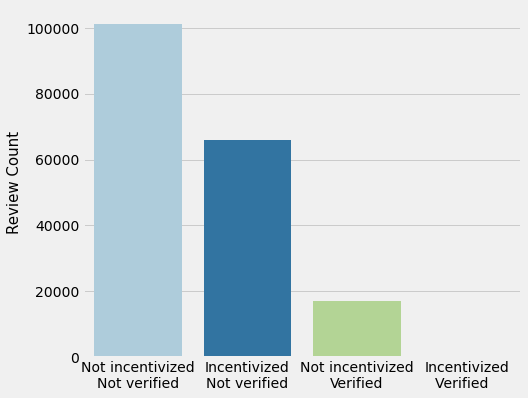

In [244]:
plt.figure(figsize=(7,6))
sns.countplot(x='inc_ver', data=df_all, order = ['Not incentivized\nNot verified',
                                                'Incentivized\nNot verified',
                                                'Not incentivized\nVerified',
                                                'Incentivized\nVerified  '], palette="Paired")
plt.xlabel("", fontsize = 15) 
plt.ylabel("Review Count", fontsize = 15) 
plt.xticks(fontsize = 14)
plt.savefig('all_data_counts',dpi=300)
plt.show()

### Plotting Unlabeled Data Prediction Proportions

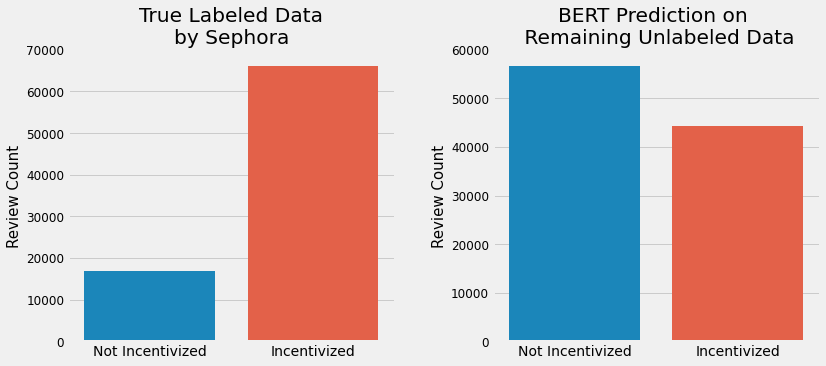

In [261]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
fig.subplots_adjust(wspace=0.3)
sns.countplot(x='inc_ver', data = df_all[(df_all['inc_ver'] =='Incentivized\nNot verified')|(df_all['inc_ver'] =='Not incentivized\nVerified')], ax = axs[0]).set_title('True Labeled Data\nby Sephora')
sns.countplot(x='y_pred', data=df_prediction_unlabeled, ax = axs[1]).set_title('BERT Prediction on \n Remaining Unlabeled Data')
axs[0].set_xlabel("", fontsize = 15) 
axs[1].set_xlabel("", fontsize = 15)
axs[0].set_ylabel("Review Count", fontsize = 15) 
axs[1].set_ylabel("Review Count", fontsize = 15)
axs[0].tick_params('x', labelsize = 14)
axs[1].tick_params('x', labelsize = 14)
axs[0].tick_params('y', labelsize = 12)
axs[1].tick_params('y', labelsize = 12)
axs[0].set_xticklabels(['Not Incentivized','Incentivized'])
axs[1].set_xticklabels(['Not Incentivized','Incentivized'])
axs[0].set_ylim(top = 70000)
axs[1].set_ylim(top = 60000)
plt.savefig('counts_comparison',dpi=300)
plt.show()

### Unlabeled Proportions if used LSTM

In [1287]:
# val_data = data.TabularDataset(path = "val.csv",
#                                 format = "csv",
#                                 fields = fields,
#                                 skip_header = True
#                                 )

In [1288]:
# val_iterator = data.BucketIterator(
#     val_data, 
#     batch_size = batch_size,
#     sort_key = lambda x: len(x.text),
#     sort_within_batch = True)

In [1289]:
# y_pred_val,y_true_val, y_proba_val = predict(model, val_iterator)

0it [00:00, ?it/s]

In [1290]:
# df_prediction_val = pd.DataFrame({'y_pred':y_pred_val})
# df_prediction_val['prediction'] = df_prediction_val['y_pred'].apply(lambda x: 1 if x==0 else 0)


In [1291]:
# df_prediction_val['prediction'].value_counts()

1    51637
0    49342
Name: prediction, dtype: int64